In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('F:\\credit\\imdbmovies.csv', encoding='latin1')


In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:

df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [30]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None
            Rating          Votes
count  7919.000000    7919.000000
mean      5.841621    1938.520394
std       1.381777   11602.415952
min       1.100000       5.000000
25%       4.900000      16.000000
50%       6.000000      55.000000
75%       6.800000     404.000000
max      10.000000  591417.000000


In [31]:
df.isnull().sum

<bound method DataFrame.sum of         Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
0      False   True      True  False    True   True     False    False   
1      False  False     False  False   False  False     False    False   
2      False  False     False  False    True   True     False    False   
3      False  False     False  False   False  False     False    False   
4      False  False     False  False    True   True     False    False   
...      ...    ...       ...    ...     ...    ...       ...      ...   
15504  False  False      True  False   False  False     False    False   
15505  False  False     False  False   False  False     False    False   
15506  False  False      True  False    True   True     False    False   
15507  False  False      True  False    True   True      True     True   
15508  False  False     False  False   False  False     False    False   

       Actor 2  Actor 3  
0        False    False  
1        False    False  
2 

In [32]:
top_rated = df.sort_values(by='Rating', ascending=False).head(10)
print(top_rated[['Name', 'Year', 'Rating']])


                      Name    Year  Rating
8339       Love Qubool Hai  (2020)    10.0
5410            Half Songs  (2021)     9.7
2563                 Breed  (2020)     9.6
11704             Ram-Path  (2017)     9.4
14222  The Reluctant Crime  (2020)     9.4
6852                  June  (2021)     9.4
5077          Gho Gho Rani  (2019)     9.4
1314          Ashok Vatika  (2018)     9.3
5125           God of gods  (2019)     9.3
12673   Secrets of Sinauli  (2021)     9.3


In [33]:
top_voted = df.sort_values(by='Votes', ascending=False).head(10)
print(top_voted[['Name', 'Votes', 'Rating']])


                         Name     Votes  Rating
8219               Life of Pi  591417.0     7.9
75                   3 Idiots  357889.0     8.4
8233                     Lion  220526.0     8.0
4848                   Gandhi  220118.0     8.0
14038  The Darjeeling Limited  185127.0     7.2
8228      Like Stars on Earth  175810.0     8.4
10882                      PK  168150.0     8.1
3410                   Dangal  165074.0     8.4
11463                   Radhe  162455.0     1.8
3829              Dil Bechara  117377.0     6.6


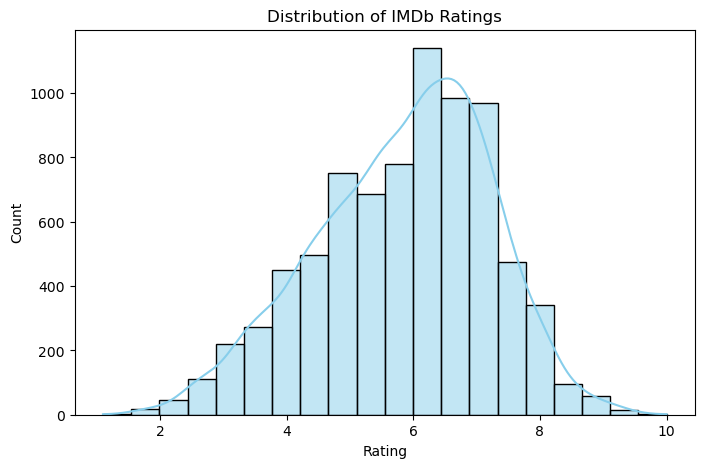

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\sanjay\AppData\Local\Temp\ipykernel_10460\2857052177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='magma')


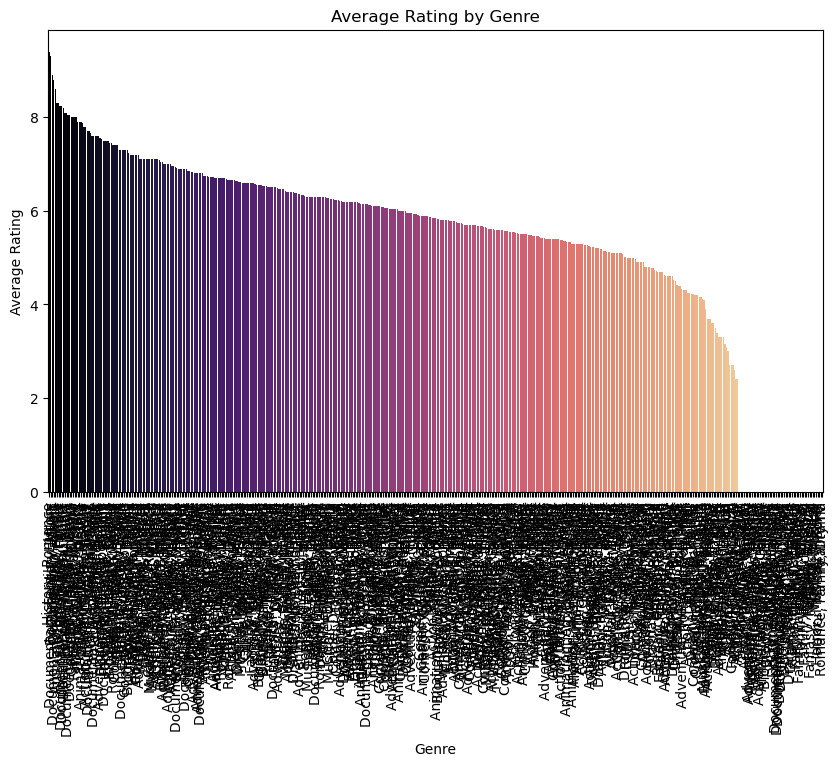

In [35]:
genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='magma')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


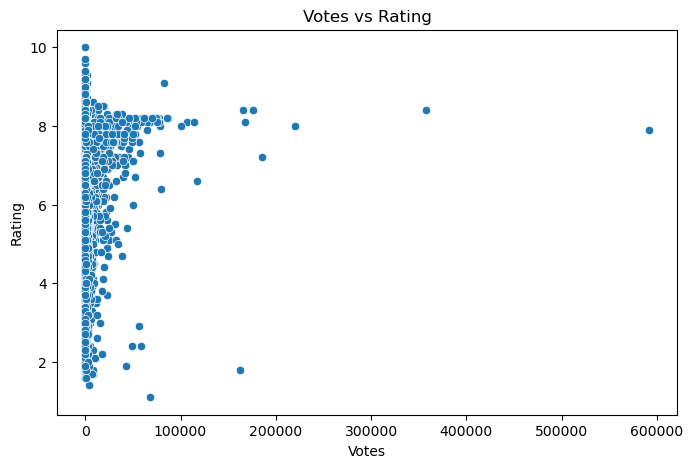

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Rating')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


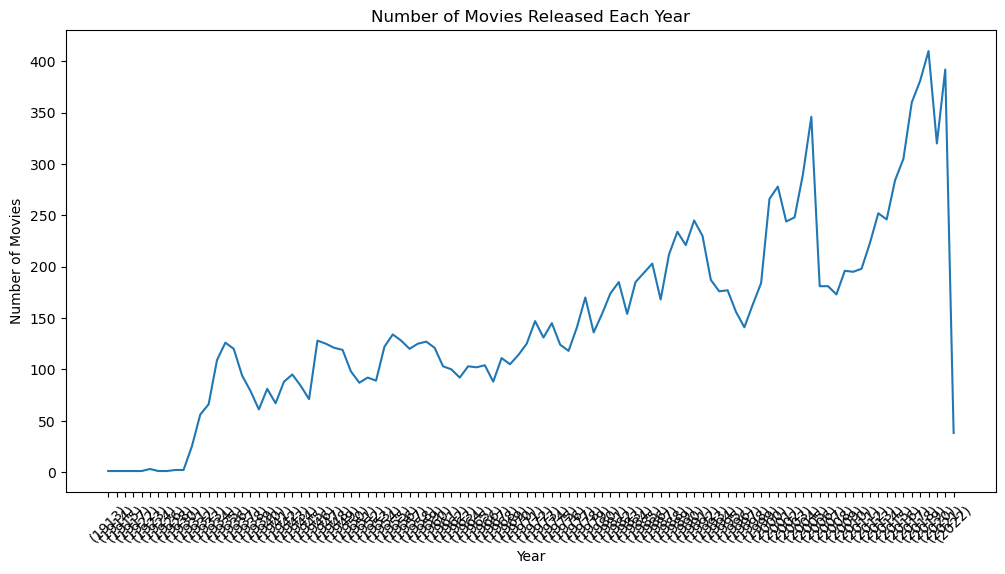

In [37]:
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [43]:
df['Rating'] = df['Rating'].replace([' ', '', 'NaN', np.nan], np.nan)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [44]:
print(df.dtypes)


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


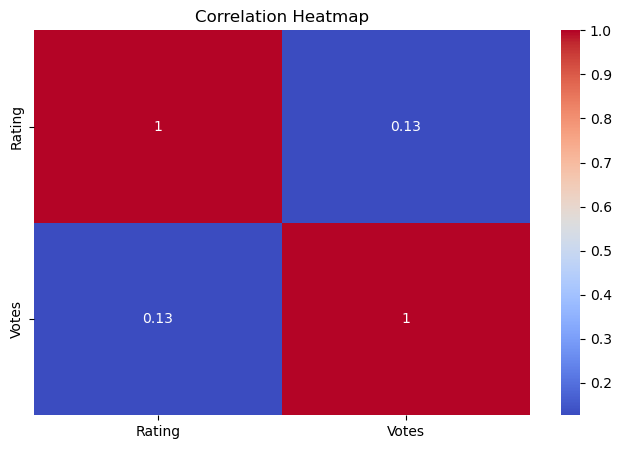

In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [55]:
# Drop rows where either the features or the target has NaN values
df_clean = df.dropna(subset=['Votes', 'Rating'])  # Ensure no NaN in Votes and Rating

X = df_clean[['Votes']]  # Features
y = df_clean['Rating']   # Target

# Split the data again after cleaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


R²: 0.016414563080030087
MSE: 1.828628085456528
